# Principio de Sustitución de Liskov (Liskov Substitution Principle)

## Introducción
El principio de sustitución de Liskov (LSP) establece que los objetos de una clase derivada deben poder sustituir a los de su clase base sin alterar el correcto funcionamiento del programa.

## Objetivos
- Comprender el principio de sustitución de Liskov y su relevancia en la herencia.
- Identificar violaciones al LSP en código Python.
- Aplicar el LSP para lograr jerarquías de clases robustas y reutilizables.

## Ejemplo de la vida real
Un billete de $10 puede ser reemplazado por dos de $5 en una transacción, sin que cambie el resultado. Así, los billetes de $5 y $10 cumplen la misma función en ese contexto.

# Liskov Substitution Principle

El Principio de Sustitución de Liskov, formulado por Barbara Liskov en 1987, es uno de los cinco principios SOLID en la programación orientada a objetos. Este principio establece que:

**Los objetos de una superclase deben poder ser reemplazados por objetos de sus subclases sin afectar la correctitud del programa.**


En otras palabras, las subclases deben ser sustituibles por sus clases base sin alterar el comportamiento esperado del programa.

## Explicación detallada

1. **Comportamiento consistente**: Las subclases deben respetar los contratos establecidos por la superclase. Esto significa que deben mantener las precondiciones y postcondiciones definidas en la clase base. Por ejemplo, si una clase base tiene un método que devuelve un valor de tipo string, la subclase debe devolver un valor del mismo tipo o un subtipo, no un valor de tipo entero.

2. **No fortalecer precondiciones**: Una subclase no debe requerir condiciones más estrictas que su superclase para realizar una operación. Por ejemplo, si una clase base requiere un parámetro de entrada opcional, la subclase no debe requerir un parámetro de entrada obligatorio.

3. **No debilitar postcondiciones**: Una subclase no debe proporcionar garantías más débiles que su superclase después de realizar una operación. Por ejemplo, si una clase base devuelve un valor de tipo string, la subclase debe devolver un valor del mismo tipo o un subtipo, no un valor de tipo entero. O si el parámetro de entrada es obligatorio, la subclase no debe aceptar un parámetro de entrada opcional.

4. **Invarianza**: Las propiedades que son verdaderas para la superclase deben mantenerse verdaderas para las subclases. Por ejemplo, si una clase base tiene un atributo que es un número entero, la subclase no debe tener un atributo que sea un número decimal.

5. **Sustitución**: Debe ser posible usar cualquier instancia de una subclase en lugar de una instancia de la superclase sin afectar la funcionalidad del programa. Por ejemplo, si se tiene una clase base `Animal` con un método `hablar()` que devuelve un saludo, una subclase `Perro` debe heredar este método y devolver el saludo adecuado para un perro. Pero, si la subclase `Perro` tiene un método `hablar()` que devuelve un saludo para un perro, no se puede usar una instancia de `Perro` en lugar de una instancia de `Animal` sin afectar la funcionalidad del programa.

## Ejemplo práctico

In [1]:
class Automovil:
    def __init__(self, modelo: str, marca: str, color: str) -> None:
        self.modelo: str = modelo
        self.marca: str = marca
        self.color: str = color
        self._estado: str = 'en_reposo'

    def acelerar(self, tipo: str = 'despacio') -> int:
        if tipo == 'rapida':
            self._estado = 'en_movimiento'
            return 100
        elif tipo == 'despacio':
            self._estado = 'en_movimiento_despacio'
            return 10
        else:
            raise ValueError("Tipo de aceleración no válido")


In [2]:
class BMW(Automovil):
    def acelerar(self, tipo: str = 'despacio') -> int:
        if tipo == 'rapida':
            self._estado = 'en_movimiento'
            return 200
        elif tipo == 'despacio':
            self._estado = 'en_movimiento_despacio'
            return 20
        else:
            raise ValueError("Tipo de aceleración no válido")


In [3]:
class Carretera:
    def __init__(self, auto: Automovil) -> None:
        self.auto: Automovil = auto

    def tipo_de_aceleracion(self, tipo: str) -> int:
        return self.auto.acelerar(tipo=tipo)


In [4]:
auto_generico = Automovil(modelo='Genérico', marca='Genérica', color='Blanco')
bmw = BMW(modelo='Serie 3', marca='BMW', color="Azul")

carretera_generica = Carretera(auto=auto_generico)
carretera_bmw = Carretera(auto=bmw)

print(carretera_generica.tipo_de_aceleracion(tipo='rapida'))  # 100
print(carretera_bmw.tipo_de_aceleracion(tipo='rapida'))  # 200

100
200


En este ejemplo:

1. La clase `Automovil` define un comportamiento base para la aceleración.

2. La clase `BMW` hereda de `Automovil` y sobrescribe el método `acelerar`, pero mantiene la misma estructura y tipos de retorno.

3. La clase `Carretera` acepta cualquier objeto de tipo `Automovil`.

Este código respeta el Principio de Sustitución de Liskov porque:

- `BMW` puede ser usado en cualquier lugar donde se espera un `Automovil`.

- `BMW` no altera la firma del método `acelerar`.

- `BMW` mantiene las mismas precondiciones (tipos de aceleración válidos) y postcondiciones (retorna un entero) que `Automovil`.

- La clase `Carretera` funciona correctamente tanto con `Automovil` como con `BMW`.

## Violación del principio LSP

Veamos ahora un ejemplo de cómo se podría violar este principio:

In [5]:
class Chevrolet(Automovil):
    def acelerar(self, tipo: str = 'despacio') -> str:
        if tipo == 'rapida':
            self._estado = 'en_movimiento'
            return "150 km/h"
        else:
            self._estado = 'en_movimiento_despacio'
            return "15 km/h"

In [6]:
# Uso que viola LSP
chevrolet = Chevrolet(modelo='Camaro', marca='Chevrolet', color="Verde")
carretera_chevrolet = Carretera(auto=chevrolet)
velocidad = carretera_chevrolet.tipo_de_aceleracion(tipo='rapida')
# Esto causará un error porque el tipo de retorno es un string y debía ser un int
print(velocidad + 50)

TypeError: can only concatenate str (not "int") to str

En este caso, `Chevrolet` viola el LSP porque:

1. Cambia el tipo de retorno de `int` a `str`.

2. No maneja el caso de "super_rapida" como lo hace `BMW`.

3. No lanza una excepción para tipos de aceleración no válidos.

Estas violaciones hacen que `Chevrolet` no sea sustituible por `Automovil` en todos los contextos, lo que podría llevar a errores en tiempo de ejecución.

## Conclusión

El Principio de Sustitución de Liskov es fundamental para crear jerarquías de clases robustas y flexibles. Ayuda a garantizar que las subclases puedan ser utilizadas de manera intercambiable con sus superclases, lo que facilita la extensión del código y reduce la probabilidad de errores cuando se trabaja con polimorfismo.

## Ejercicios prácticos y preguntas de reflexión

1. **Detecta violaciones**: Analiza una jerarquía de clases y determina si todas las subclases pueden sustituir a la clase base sin errores.
2. **Refactoriza**: Modifica una subclase que no cumple el LSP para que respete el contrato de la clase base.
3. **Pregunta de reflexión**: ¿Qué consecuencias puede tener una mala jerarquía de herencia en un sistema grande?

## Autoevaluación
- ¿Mis subclases pueden usarse en lugar de la clase base sin problemas?
- ¿Qué señales indican una posible violación del LSP?

## Referencias y recursos
- [Liskov Substitution Principle – Wikipedia](https://en.wikipedia.org/wiki/Liskov_substitution_principle)
- [SOLID Principles en Python – Real Python](https://realpython.com/solid-principles-python/)
- [Ejemplo didáctico de LSP – Refactoring Guru](https://refactoring.guru/es/design-patterns/liskov-substitution-principle)

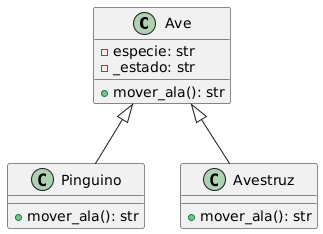

@startuml
class Ave {
    - especie: str
    - _estado: str
    + mover_ala(): str
}

class Pinguino {
    + mover_ala(): str
}

class Avestruz {
    + mover_ala(): str
}

Ave <|-- Aguila
Ave <|-- Avestruz

In [22]:
class Ave:
    def __init__(self, especie: str = "Ave") -> None:
        self.especie: str = especie
        self._estado: str = 'en reposo'

    def volar(self) -> str:
        self._estado = 'volando'
        print(f"El {self.especie} está {self._estado}")

class Pinguino(Ave):
    def volar(self) -> str:
        raise ValueError("Los pingüinos no pueden volar")

class Avestruz(Ave):
    def mover_ala(self) -> str:
        self._estado = 'corriendo, usando sus alas para equilibrarse'
        print(f"El {self.especie} está {self._estado}")

gorrion = Ave(especie="Gorrión")
gorrion.volar()
Pingui = Pinguino(especie="Pinguino")
Pingui.volar()

El Gorrión está volando


ValueError: Los pingüinos no pueden volar

In [24]:
class Ave:
    def __init__(self, especie: str = "Ave") -> None:
        self.especie: str = especie
        self._estado: str = 'en reposo'

    def mover_ala(self) -> str:
        self._estado = 'moviendo sus alas para volar'
        print(f"El {self.especie} está {self._estado}")

class Pinguino(Ave):
    def mover_ala(self) -> str:
        self._estado = 'moviendo sus alas para nadar'
        print(f"El {self.especie} está {self._estado}")

class Avestruz(Ave):
    def mover_ala(self) -> str:
        self._estado = 'corriendo, usando sus alas para equilibrarse'
        print(f"El {self.especie} está {self._estado}")

gorrion = Ave(especie="Gorrión")
gorrion.mover_ala()
pingui = Pinguino(especie="Pinguino")
pingui.mover_ala()
Avestruz(especie="Avestruz").mover_ala()

El Gorrión está moviendo sus alas para volar
El Pinguino está moviendo sus alas para nadar
El Avestruz está corriendo, usando sus alas para equilibrarse
